Our goal is to construct and train an ANN on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with Tensorflow as the backbend.

In [1]:
%matplotlib inline

Prerequisite

In [2]:
import numpy as np                                         #advanced math library
import matplotlib.pyplot as plt                            #MATLAB like plotting routine
import random                                              #For generating random numbers
%matplotlib inline

from keras.datasets import  mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, activation
from keras.utils import np_utils

Loading Training Data

In [3]:
#The MNIST data is split between 60,000 images (28 X 28 pixel)
#training images and 10,000 (28 X 28 pixel) images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib , we can plot some sample images from the training set directly into this notebook

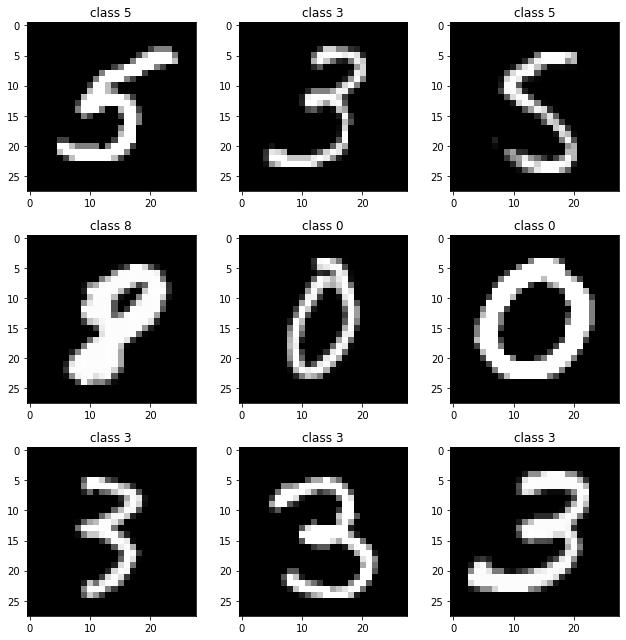

In [4]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num], cmap='gray', interpolation='none')
  plt.title("class {}".format(y_train[num]))


plt.tight_layout()

let's examine a single digit a little closer, and print out the array representing the last digit

In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0    0   29  144  143  235  253  253  253  152  143   37    0  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0   21  229  253  252  252  252  252  252  252  252  196   52  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0   78  252  253  252  252  252  252  252  252  252  252  185  0  0  0  0  0  
0  0  0    0    0    0    0    0    0    0    0   71  230  217  121   29   10   10   10   63  143  252  252  0  0  0  0  0  


Normalise the data Flatening

Formatting the input data layer instead of a 28 X 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. we will also normalize the inputs to be in the range[0-1] rather than [0-255].we do normalization so that any additional dimensions are of the same scale.

In [6]:
X_train = X_train.reshape(60000, 784)    #reshape 60,000 28 X 28 matrices
X_test = X_test.reshape(10000, 784)      #reshape 10,000 28 X 28 matrices
X_train = X_train.astype('float32')      #change integers to 32-bit floating point
X_test = X_test.astype('float32')       

X_train /= 255                            #normalize each value for each pixel
X_test /= 255

In [7]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We need to encoding for labels

In [8]:
nb_classes = 10  # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Building a 3 layer fully connected neural network(FCN)

In [9]:
from keras.engine import sequential
# The Sequential model is a linear stack of layers and is very common

model = Sequential()

In [10]:
# The first hidden layer is a set of 512 nodes(artificial neurons)
# Each node will recieve an element from each input vector and apply some weight and bias to it

model.add(Dense(512, input_shape=(784,)))    #(784, ) represents a 784 length vector! 

In [11]:
from keras.layers import Activation
# An activation is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The RELU converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged. 

model.add(Activation('relu'))

In [13]:
# Dropout zeros a selection of random outputs.
# Dropout helps protect the model from memorizing or overfitting the training data.

model.add(Dropout(0.2))    # Normal dropout range be 0.1 to 0.5

In [12]:
# The second hidden layer appears identical to our first layer.
# However instead of each of the 512-node recieving 784-inputs from the input image data, they recieve 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [14]:
# The final layer of a FCN should be equal to the number of desired classes(10 in this case)

model.add(Dense(10))

In [15]:
# The softmax activation represents a probability dist. over k different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

We need to see what are the trainable and non-trainable parameters in the summary:

In [16]:
#Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

Compiling the model

In [17]:
# let's use the Adam optimizer for learning 
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [18]:
#fit the model
model.fit(X_train, Y_train,

          batch_size =128, epochs =10,

          verbose=1)



Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.2406 - accuracy: 0.9290
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0569 - accuracy: 0.9820
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0203 - accuracy: 0.9930
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9927
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0145 - accuracy: 0.9951

Evaluate the Model's Accuracy on Test Data

In [19]:
score= model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test score:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9809
Test score: 0.07759664207696915
Test score: 0.98089998960495


In [20]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example
predicted_x = model.predict(X_test)
predicted_classes=np.argmax(predicted_x,axis=1)
# Check which items we got right/wrong
corret_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


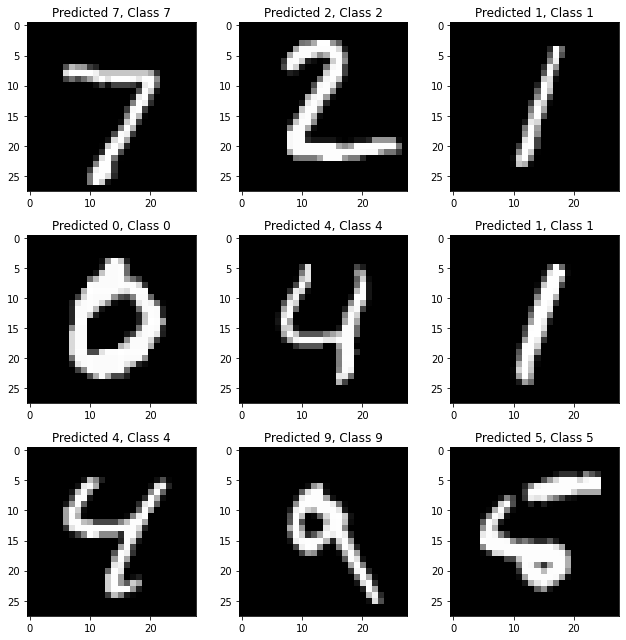

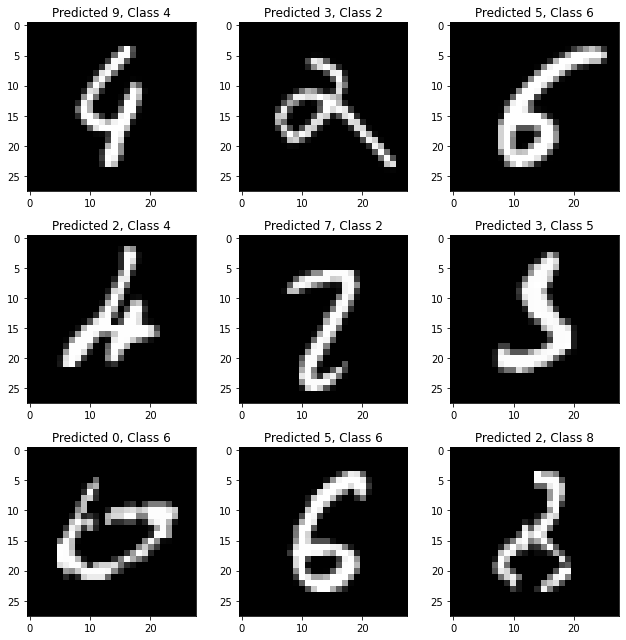

In [21]:
plt.figure()

for i, correct in enumerate(corret_indices[:9]):

    plt.subplot(3,3,i+1)

    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')

    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

    

plt.tight_layout()

    

plt.figure()

for i, incorrect in enumerate(incorrect_indices[:9]):

    plt.subplot(3,3,i+1)

    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')

    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

    

plt.tight_layout()